In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from mpl_toolkits.mplot3d import Axes3D


In [142]:
df = pd.read_csv('../content/loan_samp.csv', delimiter=',')


In [ ]:
df.info()

In [144]:
#df['Gender'].unique()
#df['Gender'].value_counts()
#df['Married'].unique()
#df['Married'].value_counts()
#df['Edu_Qualification'].unique()
#df['Edu_Qualification'].value_counts()
#df['Employment_Status'].unique()
#df['Employment_Status'].value_counts()


In [145]:
df = df.drop('Customer_ID', axis=1)


In [ ]:
df.isnull().sum()

In [147]:
df.dropna(inplace=True)

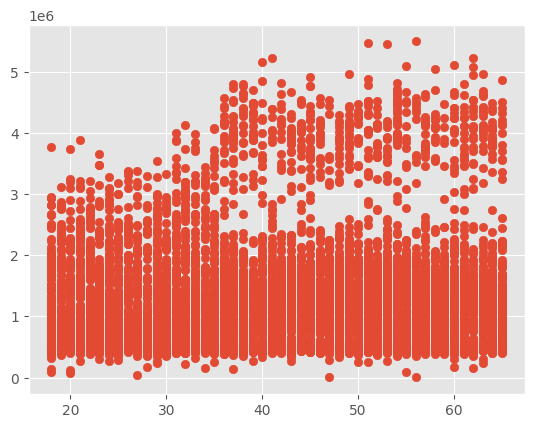

In [138]:
fig, ax = plt.subplots()
ax.scatter(df['Age'],df['Applicant_Annual_Income'])

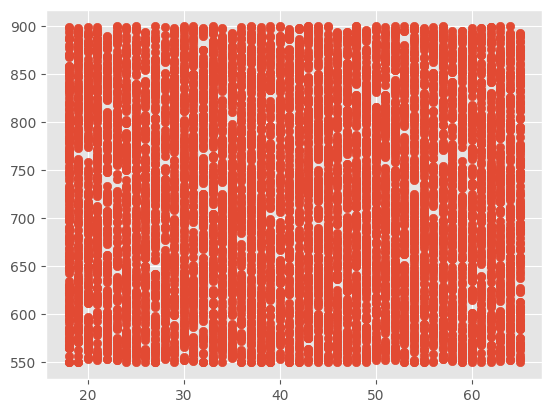

In [135]:
fig, ax = plt.subplots()
ax.scatter(df['Age'], df['Applicant_Credit_History'])

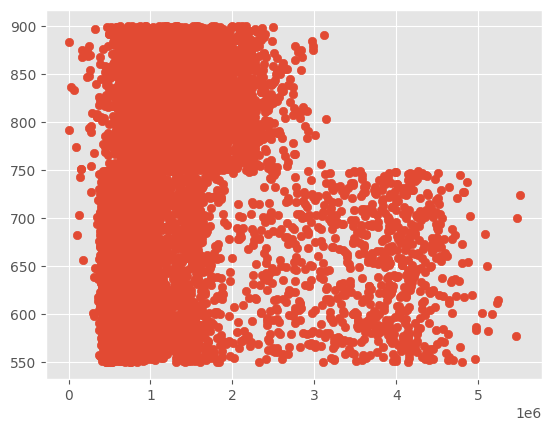

In [139]:
fig, ax = plt.subplots()
ax.scatter(df['Applicant_Annual_Income'],df['Applicant_Credit_History'])

In [ ]:
le = LabelEncoder()
df['Gender_enc']=le.fit_transform(df['Gender'])
df['Married_enc']=le.fit_transform(df['Married'])
df['Employment_Status_enc']=le.fit_transform(df['Employment_Status'])
df['Edu_Qualification_enc']=le.fit_transform(df['Edu_Qualification'])
print(df.columns)

Index(['Gender', 'Age', 'Married', 'No_Of_Dependents', 'Edu_Qualification',
       'Employment_Status', 'Applicant_Annual_Income',
       'Co_Applicant_Annual_Income', 'Applicant_Credit_History',
       'Credit_Rating', 'Existing_No_of_Loans', 'Loan Approved',
       'Loan_Amount_Availed', 'Preferred_Car', 'Gender_enc', 'Married_enc',
       'Edu_Qualification_enc', 'Credit_Rating_enc', 'Employment_Status_enc'],
      dtype='object')


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8737 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      8737 non-null   object 
 1   Age                         8737 non-null   int64  
 2   Married                     8737 non-null   object 
 3   No_Of_Dependents            8737 non-null   int64  
 4   Edu_Qualification           8737 non-null   object 
 5   Employment_Status           8737 non-null   object 
 6   Applicant_Annual_Income     8737 non-null   float64
 7   Co_Applicant_Annual_Income  8737 non-null   int64  
 8   Applicant_Credit_History    8737 non-null   int64  
 9   Credit_Rating               8737 non-null   object 
 10  Existing_No_of_Loans        8737 non-null   int64  
 11  Loan Approved               8737 non-null   object 
 12  Loan_Amount_Availed         8737 non-null   float64
 13  Preferred_Car               8737 

In [151]:
X_kmeans = df.iloc[:,[1,6,8]]

In [152]:
X_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8737 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       8737 non-null   int64  
 1   Applicant_Annual_Income   8737 non-null   float64
 2   Applicant_Credit_History  8737 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 273.0 KB


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

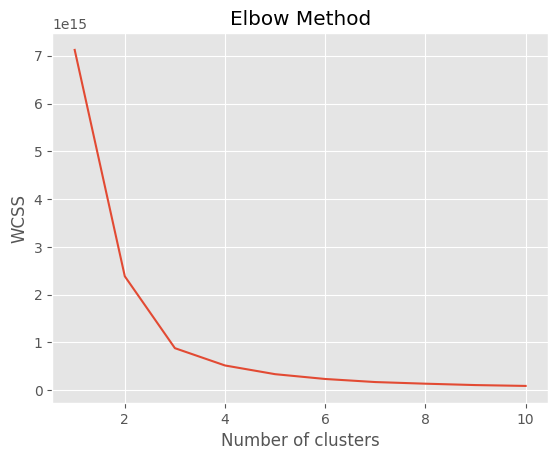

In [153]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [155]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_kmeans)
y_kmeans = kmeans.fit_predict(X_kmeans)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


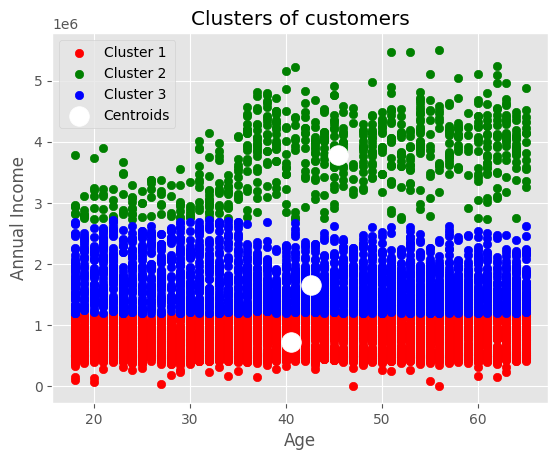

In [163]:
colors = ['red', 'green', 'blue']
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
for i in range(len(colors)):
    plt.scatter(X_kmeans.iloc[y_kmeans==i, 0], X_kmeans.iloc[y_kmeans==i, 1],color=colors[i], label=cluster_labels[i])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'white', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

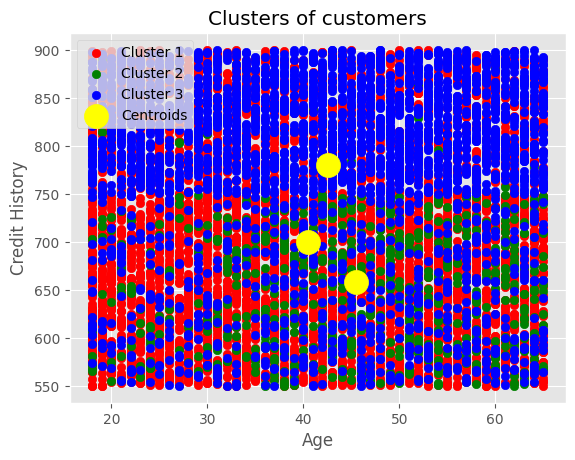

In [164]:
colors = ['red', 'green', 'blue']
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
for i in range(len(colors)):
    plt.scatter(X_kmeans.iloc[y_kmeans==i, 0], X_kmeans.iloc[y_kmeans==i, 2],color=colors[i], label=cluster_labels[i])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 200, c = 'white', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Credit History')
plt.legend()
plt.show()


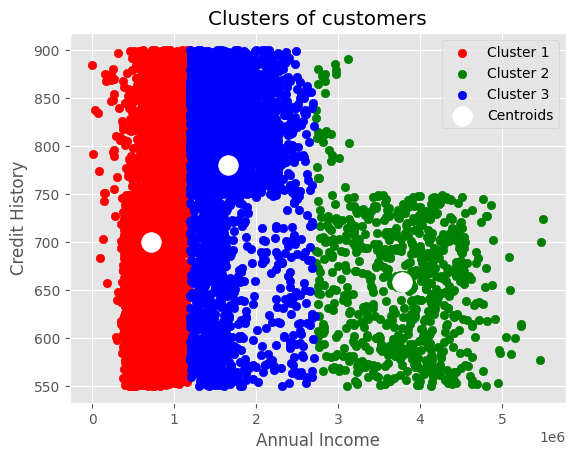

In [166]:
colors = ['red', 'green', 'blue']
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
for i in range(len(colors)):
    plt.scatter(X_kmeans.iloc[y_kmeans==i, 1], X_kmeans.iloc[y_kmeans==i, 2],color=colors[i], label=cluster_labels[i])
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 200, c = 'white', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Credit History')
plt.legend()
plt.show()


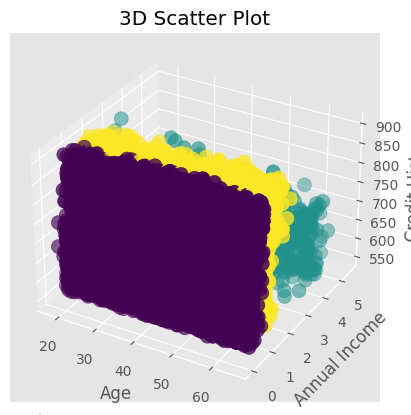

In [129]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_kmeans.iloc[:, 0], X_kmeans.iloc[:, 1], X_kmeans.iloc[:, 2],s = 100, c = kmeans.labels_)

# Set the title and labels
ax.set_title('3D Scatter Plot')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Credit History')

# Show the plot
plt.show()

In [167]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_
centers_dict={}
for i in range(len(centers)):
  centers_dict[i]=centers[i]
print(centers_dict)      

{0: array([4.05093494e+01, 7.14579594e+05, 6.99730619e+02]), 1: array([4.54827586e+01, 3.78108695e+06, 6.57983508e+02]), 2: array([4.25882153e+01, 1.66194841e+06, 7.79667916e+02])}


In [168]:
df['Cluster_Labels'] = kmeans.labels_

In [169]:
prob_func = lambda x: x.value_counts(normalize=True).rename('probability').reset_index()

prob_df = df.groupby('Cluster_Labels')['Preferred_Car'].apply(prob_func)
prob_df = prob_df.sort_values(['Cluster_Labels', 'probability'], ascending=[True, False])
result = prob_df.groupby('Cluster_Labels').head(5)

# print the result
print(result)

                                 index  probability
Cluster_Labels                                     
0              0           Hyundai i10     0.184441
               1          Toyota Etios     0.179177
               2           Tata Indigo     0.177422
               3   Maruti Suzuki Swift     0.175083
               4  Maruti Suzuki Desire     0.171963
1              0   Maruti Suzuki Swift     0.214393
               1           Hyundai i10     0.169415
               2          Toyota Etios     0.133433
               3  Maruti Suzuki Desire     0.131934
               4           Tata Indigo     0.092954
2              0  Maruti Suzuki Desire     0.150629
               1          Toyota Etios     0.149609
               2           Tata Indigo     0.146889
               3   Maruti Suzuki Swift     0.144849
               4           Hyundai i10     0.138388


In [ ]:
new_data = np.array([[56,100000,650]])
cluster_labels = kmeans.predict(new_data)

# Print the cluster labels for the new datapoints
print("Cluster labels for new datapoints:", cluster_labels[0])